In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [50]:
class TSP:
    
    def __init__(self,list_pts):
        self.list_pts = list_pts
        self.solution=[]
    
    def solve(self):
        
        
        distance_matrix=distance.cdist(self.list_pts, self.list_pts, 'euclidean')
        
        num_starting_point=np.random.randint(0,len(self.list_pts))
        starting_point = self.list_pts[num_starting_point,:]
        
        self.solution.append(starting_point)
        
        for i in range(len(self.list_pts)):
            
            distance_matrix[i,i]=float('inf')
            distance_matrix[i,num_starting_point]=float('inf')
        
        
        print(distance_matrix)
        num_next_point=num_starting_point
        
        for i in [i for i in range(len(self.list_pts)) if  i!=num_starting_point]:
            
            num_next_point=np.argmin(distance_matrix[num_next_point,:])
            next_point = self.list_pts[num_next_point,:]
            self.solution.append(next_point)
            print(num_next_point)

            for j in range(len(self.list_pts)):

                distance_matrix[j,num_next_point]=float('inf')
        
        self.solution.append(starting_point)
        return(self.solution)
    
    def display(self):
        
        
        if (self.solution==[]):
                self.solve()
                
        
        x=[i[0] for i in self.solution]
        y=[i[1] for i in self.solution]

        plt.plot(x, y, marker="o", markerfacecolor="r")
        
    def cost(self):
        
        if (self.solution==[]):
                self.solve()
                
        return(np.sum(distance.cdist(self.solution, self.solution, 'euclidean'))/2)
        
        

[[        inf  5.09901951  6.32455532  6.08276253  8.06225775  7.07106781
          inf  7.61577311  2.23606798  1.          7.          2.23606798
   5.09901951  7.61577311  8.60232527  5.          4.47213595  7.07106781
   7.07106781  8.06225775]
 [ 5.09901951         inf  5.83095189  1.          3.          2.82842712
          inf  2.82842712  5.          5.          2.23606798  6.08276253
   7.21110255  6.32455532  6.          6.40312424  3.16227766  7.21110255
   2.          3.        ]
 [ 6.32455532  5.83095189         inf  6.40312424  7.81024968  8.60232527
          inf  5.83095189  8.06225775  5.38516481  7.81024968  5.
   3.16227766  1.41421356  3.16227766  2.23606798  8.24621125  1.41421356
   7.07106781  7.81024968]
 [ 6.08276253  1.          6.40312424         inf  2.          2.23606798
          inf  2.23606798  5.83095189  6.          1.41421356  7.07106781
   8.06225775  6.70820393  6.08276253  7.21110255  3.60555128  7.81024968
   1.          2.        ]
 [ 8.0622577

[array([6, 7]),
 array([6, 8]),
 array([7, 8]),
 array([9, 7]),
 array([9, 4]),
 array([6, 3]),
 array([6, 2]),
 array([6, 1]),
 array([6, 0]),
 array([6, 0]),
 array([7, 1]),
 array([8, 1]),
 array([4, 1]),
 array([0, 3]),
 array([0, 5]),
 array([1, 6]),
 array([0, 7]),
 array([2, 8]),
 array([2, 9]),
 array([5, 9]),
 array([6, 7])]

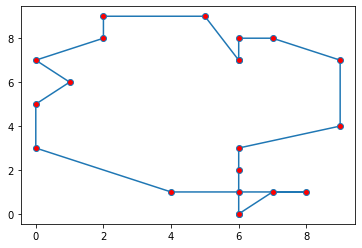

In [54]:
test=TSP(np.random.randint(10, size=(20, 2)))
test.display()
test.solution
#test.cost()